# 2-TransBigData的栅格处理框架
## 为什么要基于栅格处理数据?
**离散化**   
在连续的空间中很难分析数据，但在离散的区域中很容易分析。定义空间分析单元可以使区域离散化。   
**可比性**    
所有的栅格都有相同的尺寸，它们的属性在相同的标准下是可以比较的。   
**可控制**    
在基于栅格的框架下，聚集精度是可控的。定义较小的栅格可以提高精度，但会增加计算负担。   
**高效**    
使用TransBigData，GPS数据可以以较小的计算复杂度与栅格相匹配。栅格和GPS数据之间匹配的计算速度很高。   

这个样例中将展示TransBigData的栅格处理方法，TransBigData提供了一系列的方法，能够在数据点、栅格ID、区域、栅格几何图形之间互相转换。下图是相关方法的总览：

![栅格处理框架](../grids/1648715064154.png)

我们首先导入相关的包

In [1]:
import transbigdata as tbd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import random

In [2]:
# 读取研究区域的地理图形
jiading_polygon = gpd.read_file(r'../../../example/data/jiading_polygon/jiading_polygon.shp')
jiading_polygon.head() 

,id,geometry
0,1,"POLYGON ((121.22538 31.35142, 121.22566 31.350..."


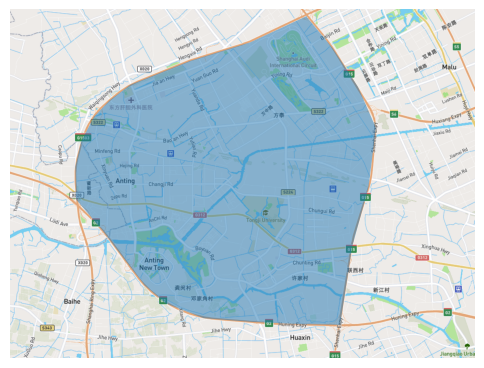

In [3]:
#设定研究范围的边界
jiading_rec_bound = [121.1318, 31.2484, 121.2553, 31.3535]
#绘制区域以及地图底图
fig = plt.figure(1, (6, 6), dpi=100)
ax = plt.subplot(111)
plt.sca(ax)
#plot_map函数加载底图
tbd.plot_map(plt, bounds=jiading_rec_bound, zoom=13, style=2)
#绘制地理区域
jiading_polygon.plot(ax=ax, alpha=0.5)
plt.axis('off');

## 给定区域面，生成栅格：area_to_grid

`transbigdata.area_to_grid`(location, accuracy=500, method='rect', params='auto')

从给定的区域面生成栅格，此方法会输出栅格的地理图形和栅格参数，默认情况下是方形栅格`rect`。栅格大小由`accuracy`参数设置，代表边长，单位m

在TransBigData中，栅格坐标系是由栅格化参数`params`决定的。每个栅格化参数都可以定义一个栅格化坐标系。

In [4]:
grid_rec, params_rec = tbd.area_to_grid(jiading_polygon)
#栅格参数，方形栅格下method参数是rect，代表方形栅格
pprint.pprint(params_rec)
#栅格几何图形
grid_rec.head()

{'deltalat': 0.004496605206422906,
 'deltalon': 0.005262604989003139,
 'gridsize': 500,
 'method': 'rect',
 'slat': 31.25168182840957,
 'slon': 121.13797109957756,
 'theta': 0}


,LONCOL,LATCOL,geometry
171,9,0,"POLYGON ((121.18270 31.24943, 121.18797 31.249..."
174,10,0,"POLYGON ((121.18797 31.24943, 121.19323 31.249..."
177,11,0,"POLYGON ((121.19323 31.24943, 121.19849 31.249..."
180,12,0,"POLYGON ((121.19849 31.24943, 121.20375 31.249..."
183,13,0,"POLYGON ((121.20375 31.24943, 121.20902 31.249..."


也可以生成三角形和六边形栅格，三角形是`tri`，六边形则是`hexa`

In [5]:
# 生成三角形栅格
grid_tri, params_tri = tbd.area_to_grid(jiading_polygon, method='tri') 
pprint.pprint(params_tri)
grid_tri.head()

{'deltalat': 0.004496605206422906,
 'deltalon': 0.005262604989003139,
 'gridsize': 500,
 'method': 'tri',
 'slat': 31.25168182840957,
 'slon': 121.13797109957756,
 'theta': 0}


,loncol_1,loncol_2,loncol_3,geometry
22,6,2,-5,"POLYGON ((121.17481 31.25947, 121.16955 31.256..."
24,7,2,-5,"POLYGON ((121.17481 31.25428, 121.18007 31.256..."
27,8,3,-5,"POLYGON ((121.18007 31.25168, 121.18533 31.254..."
28,8,3,-6,"POLYGON ((121.18533 31.25947, 121.18007 31.256..."
30,9,3,-6,"POLYGON ((121.18533 31.25428, 121.19060 31.256..."


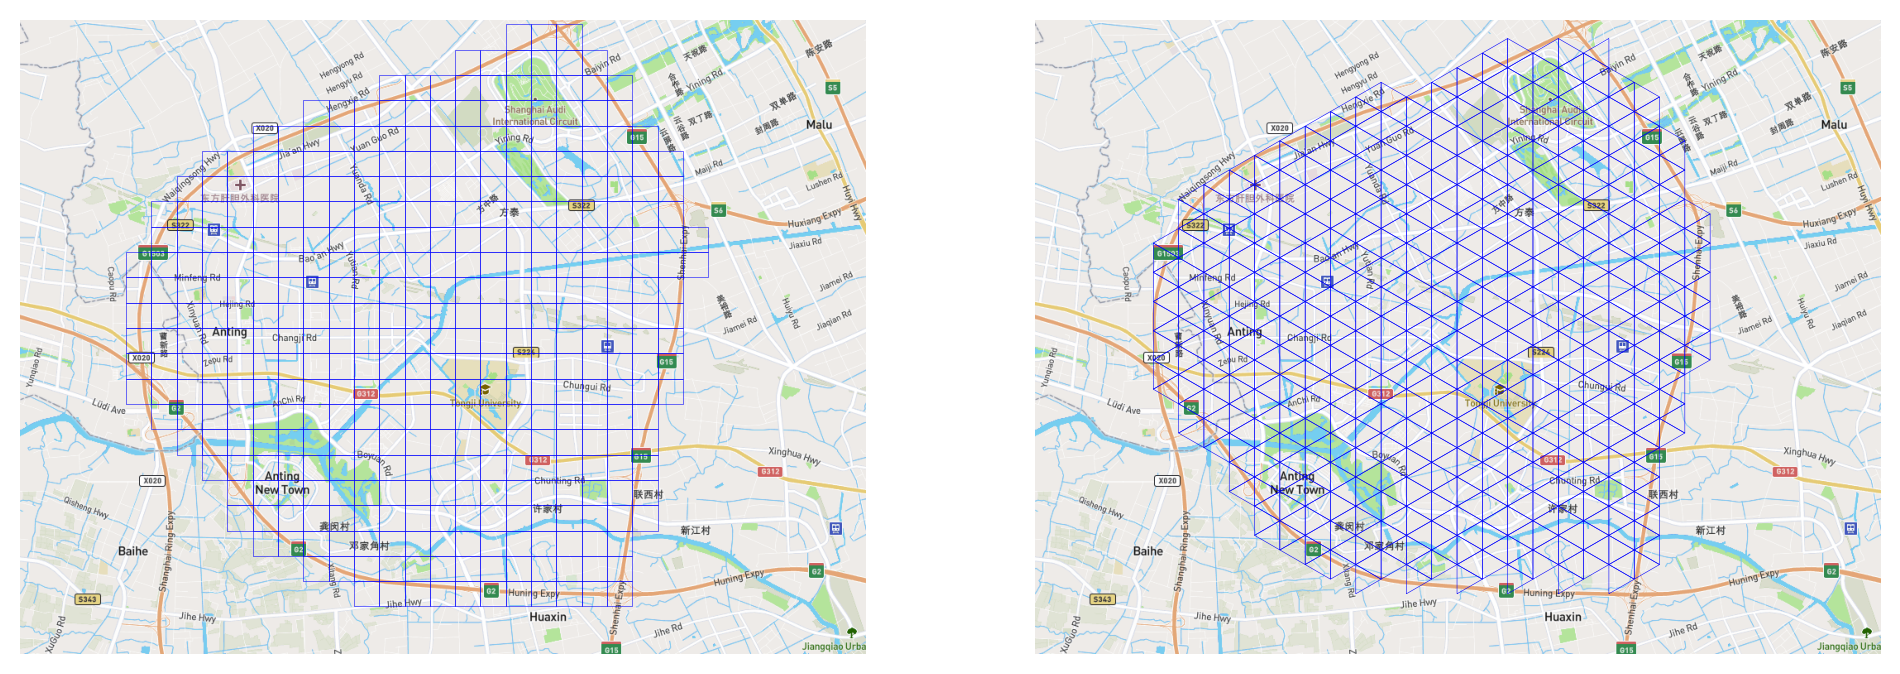

In [6]:
#可视化刚才创建的方形和三角形栅格
#创建图框
fig = plt.figure(1, (12, 8), dpi=200)
ax1 = plt.subplot(121)
plt.sca(ax1)
tbd.plot_map(plt, bounds=jiading_rec_bound, zoom=13, style=2)
#绘制方形栅格
grid_rec.plot(ax=ax1, lw=0.2, edgecolor='blue', facecolor="None")
plt.axis('off');
#创建第二个图框
ax2 = plt.subplot(122)
plt.sca(ax2)
tbd.plot_map(plt, bounds=jiading_rec_bound, zoom=13, style=2)
#绘制三角形栅格
grid_tri.plot(ax=ax2, lw=0.2, edgecolor='blue', facecolor="None")
plt.axis('off');

## 给定区域面，生成栅格参数：area_to_params

`transbigdata.area_to_params`(location, accuracy=500, method='rect')

在大部分时候，数据在空间上分布比较稀疏，我们不需要在研究范围内生成所有网格。在这种情况下，我们可以使用`transbigdata.area_to_params`。
这种方法只为栅格创建栅格参数，一个栅格参数可以确定一个栅格坐标系

In [7]:
params = tbd.area_to_params(jiading_polygon)
pprint.pprint(params)

{'deltalat': 0.004496605206422906,
 'deltalon': 0.005262604989003139,
 'gridsize': 500,
 'method': 'rect',
 'slat': 31.25168182840957,
 'slon': 121.13797109957756,
 'theta': 0}


## 数据对应至栅格：GPS_to_grid

`transbigdata.GPS_to_grid`(lon, lat, params)

接下来，我们需要将地理坐标点数据对应至栅格，需要知道每个数据点落在哪一个栅格中

In [8]:
# 接下来，我们随机生成一些数据点
lon_list, lat_list = [], []
for i in range(100): 
    gps_lon = random.uniform(jiading_rec_bound[0], jiading_rec_bound[2]) 
    gps_lat = random.uniform(jiading_rec_bound[1], jiading_rec_bound[3]) 
    lon_list.append(gps_lon) 
    lat_list.append(gps_lat) 
    
gps_random = pd.DataFrame({'veh_id': range(100),
                           'lon': lon_list,
                           'lat': lat_list,
                          })

gps_random.head()

,veh_id,lon,lat
0,0,121.181601,31.307315
1,1,121.208685,31.314066
2,2,121.184995,31.318599
3,3,121.135457,31.328884
4,4,121.228953,31.331297


In [9]:
# 将这些数据对应至栅格ID
gps_random['LonCol'], gps_random['LatCol'] = tbd.GPS_to_grid(gps_random['lon'], gps_random['lat'], params_rec)

gps_random.head()

,veh_id,lon,lat,LonCol,LatCol
0,0,121.181601,31.307315,8,12
1,1,121.208685,31.314066,13,14
2,2,121.184995,31.318599,9,15
3,3,121.135457,31.328884,0,17
4,4,121.228953,31.331297,17,18


## 由栅格ID生成栅格中心点坐标：grid_to_centre

`transbigdata.grid_to_centre`(gridid, params)

输入栅格ID的列与栅格参数，则可以获得栅格中心点的坐标

In [10]:
# 栅格ID列作为list，输入grid_to_centre方法中
gps_random['LonGridCenter'], gps_random['LatGridCenter'] = tbd.grid_to_centre([gps_random['LonCol'], gps_random['LatCol']], params_rec)
gps_random.head()

,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter
0,0,121.181601,31.307315,8,12,121.180072,31.305641
1,1,121.208685,31.314066,13,14,121.206385,31.314634
2,2,121.184995,31.318599,9,15,121.185335,31.319131
3,3,121.135457,31.328884,0,17,121.137971,31.328124
4,4,121.228953,31.331297,17,18,121.227435,31.332621


## 由栅格ID生成几何信息
`transbigdata.grid_to_polygon`(gridid, params)

通过栅格ID，生成几何信息列

In [11]:
# 生成栅格几何图形列
gps_random['geometry'] = tbd.grid_to_polygon([gps_random['LonCol'], gps_random['LatCol']], params_rec)
gps_random.head()

,veh_id,lon,lat,LonCol,LatCol,LonGridCenter,LatGridCenter,geometry
0,0,121.181601,31.307315,8,12,121.180072,31.305641,"POLYGON ((121.1774406369951 31.30339278828343,..."
1,1,121.208685,31.314066,13,14,121.206385,31.314634,"POLYGON ((121.2037536619401 31.31238599869628,..."
2,2,121.184995,31.318599,9,15,121.185335,31.319131,"POLYGON ((121.1827032419841 31.3168826039027, ..."
3,3,121.135457,31.328884,0,17,121.137971,31.328124,"POLYGON ((121.135339797083 31.32587581431555, ..."
4,4,121.228953,31.331297,17,18,121.227435,31.332621,"POLYGON ((121.2248040818961 31.33037241952197,..."


<AxesSubplot:>

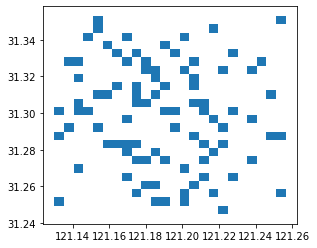

In [12]:
gps_random = gpd.GeoDataFrame(gps_random)
gps_random.plot()

## 从栅格中获取栅格参数：grid_to_params（目前只支持不旋转的方型栅格）

`transbigdata.grid_to_params`(grid)

In [16]:
grid_rec.head() 

,LONCOL,LATCOL,geometry
171,9,0,"POLYGON ((121.18270 31.24943, 121.18797 31.249..."
174,10,0,"POLYGON ((121.18797 31.24943, 121.19323 31.249..."
177,11,0,"POLYGON ((121.19323 31.24943, 121.19849 31.249..."
180,12,0,"POLYGON ((121.19849 31.24943, 121.20375 31.249..."
183,13,0,"POLYGON ((121.20375 31.24943, 121.20902 31.249..."


In [17]:
tbd.grid_to_params(grid_rec)

{'slon': 121.13797109957761,
 'slat': 31.25168182840957,
 'deltalon': 0.005262604988999442,
 'deltalat': 0.0044966052064197015,
 'theta': 0,
 'method': 'rect'}